In [8]:
from langchain_community.utilities import SQLDatabase
from langchain_core.tools import tool
from langgraph.runtime import get_runtime
from langchain.agents import create_agent
from dataclasses import dataclass
from dotenv import load_dotenv

load_dotenv()

# Assigning sample database to variable
db = SQLDatabase.from_uri("sqlite:///Chinook.db")

@dataclass
class RuntimeContext:
    db: SQLDatabase

# Defining sql execution tool
@tool("execute_sql", description="Execute SQLite commands and return results")
def execute_sql(query: str) -> str:
    """Execute SQLite command and return results."""
    runtime = get_runtime(RuntimeContext)
    # db = runtime.context.db
    db = runtime.context.db

    try:
        return db.run(query)
    except Exception as e:
        return f"Error: {e}"


# Defining system prompt
system_prompt = """
    You are a careful SQLite assistant.
    Rules:
    - Think step-by-step.
    - When you need data call the tool "execute_sql" with ONE SELECT query.
    - Read-only only: o INSET/UPDATE/DELETE/ALTER/DROP/CREATE/REPLACE/TRUNCATE.
    - Limit to 5 rows of output unless the user explicitly asks otherwise.
    - If the tool returns "Error:", revise the SQL query and try again.
    Prefer explicit column lists; avoid SELECT *.
"""

# Creating agent using anthropic model
agent = create_agent(
    model = "anthropic:claude-sonnet-4-5",
    system_prompt = system_prompt,
    tools = [execute_sql],
    context_schema=RuntimeContext
)



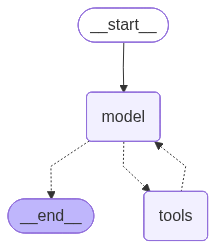

In [9]:
# Visualizing agent infrastructure
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

In [10]:
# Defining query
query = "Which table has the largest number of entries?"


# Streaming agent response and iterating over each step to print agent thought process and reasoning 
for step in agent.stream({
    "messages": [
        {"role":"user", "content": query}
        ]},
    context = RuntimeContext(db=db),
    stream_mode = "values"
):
    step["messages"][-1].pretty_print()
    

================================ Human Message =================================

Which table has the largest number of entries?
================================== Ai Message ==================================

[{'text': "I'll help you find which table has the largest number of entries. First, let me get a list of all tables in the database, then count the entries in each.", 'type': 'text'}, {'id': 'toolu_01WAPpBqkbneUoxidxRN1huW', 'input': {'query': "SELECT name FROM sqlite_master WHERE type='table'"}, 'name': 'execute_sql', 'type': 'tool_use'}]
Tool Calls:
  execute_sql (toolu_01WAPpBqkbneUoxidxRN1huW)
 Call ID: toolu_01WAPpBqkbneUoxidxRN1huW
  Args:
    query: SELECT name FROM sqlite_master WHERE type='table'
================================= Tool Message =================================
Name: execute_sql

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_tra

In [77]:
query = "Which genre on average has the longest tracks length?"

for step in agent.stream({
    "messages": [
        {"role":"user", "content": query}
        ]},
    context = RuntimeContext(db=db),
    stream_mode = "values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which genre on average has the longest tracks length?
================================== Ai Message ==================================

[{'text': "I'll help you find which genre has the longest average track length. Let me start by exploring the database structure to understand the tables and their relationships.", 'type': 'text'}, {'id': 'toolu_01DpZthcTg72tYeFdAp5jGCq', 'input': {'query': "SELECT name FROM sqlite_master WHERE type='table'"}, 'name': 'execute_sql', 'type': 'tool_use'}]
Tool Calls:
  execute_sql (toolu_01DpZthcTg72tYeFdAp5jGCq)
 Call ID: toolu_01DpZthcTg72tYeFdAp5jGCq
  Args:
    query: SELECT name FROM sqlite_master WHERE type='table'
================================= Tool Message =================================
Name: execute_sql

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlis

In [79]:
# Defining query
query = "Which customer made the most purchases in the first quarter of each year and what what their average purchase order price?"


# Streaming agent response and iterating over each step to print agent thought process and reasoning 
for step in agent.stream({
    "messages": [
        {"role":"user", "content": query}
        ]},
    context = RuntimeContext(db=db),
    stream_mode = "values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which customer made the most purchases in the first quarter of each year and what what their average purchase order price?
================================== Ai Message ==================================

[{'text': "I'll help you find the customer who made the most purchases in Q1 of each year and their average purchase order price. Let me start by exploring the database structure.", 'type': 'text'}, {'id': 'toolu_01DW9ZmkJoMHwFAQirxNer9q', 'input': {'query': "SELECT name FROM sqlite_master WHERE type='table'"}, 'name': 'execute_sql', 'type': 'tool_use'}]
Tool Calls:
  execute_sql (toolu_01DW9ZmkJoMHwFAQirxNer9q)
 Call ID: toolu_01DW9ZmkJoMHwFAQirxNer9q
  Args:
    query: SELECT name FROM sqlite_master WHERE type='table'
================================= Tool Message =================================
Name: execute_sql

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('gen